# KNN

In [1]:
# import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the Training and Testing Data
x_train = pd.read_pickle('data/x_train.pkl')
y_train = pd.read_pickle('data/y_train.pkl')

x_test = pd.read_pickle('data/x_test.pkl')
y_test = pd.read_pickle('data/y_test.pkl')

# Min Max Normalization

In [3]:
# Normalize features to [0,1]
minmax_scaler = MinMaxScaler()
x_train = pd.DataFrame(minmax_scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(minmax_scaler.fit_transform(x_test), columns=x_test.columns)

## Implementing Basic KNN

In [4]:
# model
k_nearest_neighbours = KNeighborsClassifier()

# fit the model
k_nearest_neighbours.fit(x_train, y_train)

# prediction
predictions = k_nearest_neighbours.predict(x_test)

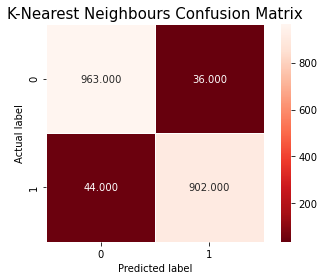

In [5]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('K-Nearest Neighbours Confusion Matrix', size = 15);
plt.show()

In [6]:
# Take F1 macro score as performance metric
f1_macro_average = f1_score(y_test, predictions)

print(f'F1 score --> {round(f1_macro_average*100, 2)}%')

F1 score --> 95.75%


## Hyperparameter Tuning for Better Results

We will tune for:
- n_neighbors - number of neighbors
- metric - way of calculating the distance

In [7]:
# create a list of odd n neighbours to tune for
n_neighbors = list()
for i in range(1,50,2):
    n_neighbors.append(i)

# create a list of all distance measurements
metric = ['minkowski','euclidean','manhattan']

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, metric=metric)

print(hyperparameters)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49], 'metric': ['minkowski', 'euclidean', 'manhattan']}


In [8]:
# Implement GridSearch to check and get the best hyperparameters

# estimator = ML model to be tested
# param_grid = dictionary of hyperparameters to be tested
# scoring = the scoring metric, for this imbalanced classification task, i chose f1 macro
# n_jobs = number of cores to be used in parallel, -1 means use all
# cv = number of cross validation set elements
# verbose = setting it to 2 will print updates to the terminal

best_model = GridSearchCV(estimator=KNeighborsClassifier(),
                         param_grid=hyperparameters, 
                         scoring = 'f1_macro',
                         n_jobs=-1,
                         cv=10,
                         verbose=2)

# Fit the model
best_model = best_model.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


In [9]:
n_neighbors = best_model.best_estimator_.get_params()['n_neighbors']
metric = best_model.best_estimator_.get_params()['metric']

print(f'Best n_neighbors: {n_neighbors}')
print(f'Best metric: {metric}')

Best n_neighbors: 3
Best metric: manhattan


In [10]:
# model
k_nearest_neighbours = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

# fit the model
k_nearest_neighbours.fit(x_train, y_train)

# prediction
predictions = k_nearest_neighbours.predict(x_test)

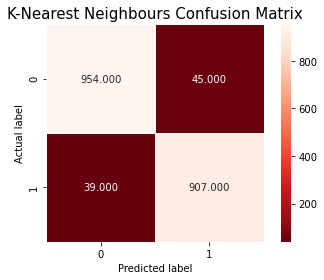

In [11]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('K-Nearest Neighbours Confusion Matrix', size = 15);
plt.show()

In [12]:
# Take F1 macro score as performance metric
f1_macro_average = f1_score(y_test, predictions)

print(f'F1 score --> {round(f1_macro_average*100, 2)}%')

F1 score --> 95.57%
